### 영상 공간 필터링

#### 필요한 라이브러리 임포트

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets 
import IPython.display as display
from ipywidgets import Layout, Button, Box, Layout, Image, IntSlider, AppLayout

### 블러필터

In [2]:
#Component 선언
IntSlider_Box = IntSlider(
    value=1,
    min=1,
    max=30,
    step=1,
    description='ksize: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Biateral = IntSlider(
    value=0,
    min=-1,
    max=30,
    step=1,
    description='d: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_MedianBlur = IntSlider(
    value=1,
    min=1,
    max=20,
    step=2,
    description='ksize: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)


IntSlider_Blur = IntSlider(
    value=1,
    min=1,
    max=20,
    step=1,
    description='ksize: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Gaussian = IntSlider(
    value=1,
    min=1,
    max=20,
    step=2,
    description='ksize: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Gaussian2 = IntSlider(
    value=0,
    min=0,
    max=10,
    step=1,
    description='Sigma: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original = Image(layout = Layout(border="solid"), width="50%") 
wImg_Box = Image(layout = Layout(border="solid"), width="50%") 
wImg_Biateral = Image(layout = Layout(border="solid"), width="50%") 
wImg_MedianBlur = Image(layout = Layout(border="solid"), width="50%") 
wImg_Blur = Image(layout = Layout(border="solid"), width="50%") 
wImg_Gaussian = Image(layout = Layout(border="solid"), width="50%") 

box1 = layout(IntSlider_Box,wImg_original,wImg_Box)
box2 = layout(IntSlider_Biateral,wImg_original,wImg_Biateral)
box3 = layout(IntSlider_MedianBlur,wImg_original,wImg_MedianBlur)
box4 = layout(IntSlider_Blur,wImg_original,wImg_Blur)

items = [IntSlider_Gaussian,IntSlider_Gaussian2]
Gaussian = Box(items)
box5 = layout(Gaussian,wImg_original,wImg_Gaussian)


tab_nest = widgets.Tab()
tab_nest.children = [box1, box2, box3, box4, box5]
tab_nest.set_title(0, 'Box Filter')
tab_nest.set_title(1, 'Biateral Filter')
tab_nest.set_title(2, 'MedianBlur Filter')
tab_nest.set_title(3, 'Blur Filter')
tab_nest.set_title(4, 'Gaussian Filter')
tab_nest

img = cv2.imread('./data/lena.jpg',0)
tmpStream = cv2.imencode(".jpeg", img)[1].tostring()
wImg_original.value = tmpStream

display.display(tab_nest)

#Event 선언
gaussian_ksize, gaussian_sigma = 1,0

def on_value_change_Box(change):
    ksize = change['new']
    Box_img = cv2.boxFilter(img,ddepth=-1,ksize=(ksize,ksize))
    tmpStream = cv2.imencode(".jpeg", Box_img)[1].tostring()
    wImg_Box.value = tmpStream
    
def on_value_change_Biateral(change):
    d = change['new']
    Biateral_img = cv2.bilateralFilter(img,d=d,sigmaColor = 10, sigmaSpace = 10)
    tmpStream = cv2.imencode(".jpeg", Biateral_img)[1].tostring()
    wImg_Biateral.value = tmpStream
    
def on_value_change_MedianBlur(change):
    ksize = change['new']
    MedianBlur_img = cv2.medianBlur(img,ksize=ksize)
    tmpStream = cv2.imencode(".jpeg", MedianBlur_img)[1].tostring()
    wImg_MedianBlur.value = tmpStream
    
def on_value_change_Blur(change):
    ksize = change['new']
    Blurr_img = cv2.blur(img,ksize=(ksize,ksize))
    tmpStream = cv2.imencode(".jpeg", Blurr_img)[1].tostring()
    wImg_Blur.value = tmpStream
    
def on_value_change_Gaussian(change):
    global gaussian_ksize, gaussian_sigma
    gaussian_ksize = change['new']
    Gaussian_img = cv2.GaussianBlur(img,ksize=(gaussian_ksize,gaussian_ksize),sigmaX=gaussian_sigma)
    tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
    wImg_Gaussian.value = tmpStream
    
def on_value_change_Gaussian2(change):
    global gaussian_ksize, gaussian_sigma
    gaussian_sigma = change['new']
    Gaussian_img = cv2.GaussianBlur(img,ksize=(gaussian_ksize,gaussian_ksize),sigmaX=gaussian_sigma)
    tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
    wImg_Gaussian.value = tmpStream
    

#초기화 작업
Box_img = cv2.boxFilter(img,ddepth=-1,ksize=(1,1))
tmpStream = cv2.imencode(".jpeg", Box_img)[1].tostring()
wImg_Box.value = tmpStream

Biateral_img = cv2.bilateralFilter(img,d=0,sigmaColor = 10, sigmaSpace = 10)
tmpStream = cv2.imencode(".jpeg", Biateral_img)[1].tostring()
wImg_Biateral.value = tmpStream
    
MedianBlur_img = cv2.medianBlur(img,ksize=1)
tmpStream = cv2.imencode(".jpeg", MedianBlur_img)[1].tostring()
wImg_MedianBlur.value = tmpStream

Blurr_img = cv2.blur(img,ksize=(1,1))
tmpStream = cv2.imencode(".jpeg", Blurr_img)[1].tostring()
wImg_Blur.value = tmpStream

Gaussian_img = cv2.GaussianBlur(img,ksize=(gaussian_ksize,gaussian_ksize),sigmaX=gaussian_sigma)
tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
wImg_Gaussian.value = tmpStream

#Component에 Event 장착
IntSlider_Box.observe(on_value_change_Box, names='value')
IntSlider_Biateral.observe(on_value_change_Biateral, names='value')
IntSlider_MedianBlur.observe(on_value_change_MedianBlur, names='value')
IntSlider_Blur.observe(on_value_change_Blur, names='value')
IntSlider_Gaussian.observe(on_value_change_Gaussian, names='value')
IntSlider_Gaussian2.observe(on_value_change_Gaussian2, names='value')

#### 이미지 만들기

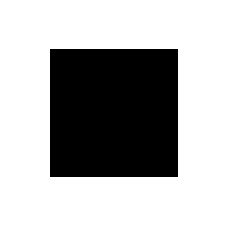

True

In [3]:
def plot(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
img = np.zeros((512,512,3),dtype=np.int32)+255

pt1 = 100,100
pt2 = 400,400
cv2.rectangle(img,pt1,pt2,(0,0,0),-1)

plt.axis('off')
plt.imshow(img)
plt.show()
cv2.imwrite('./data/rectangle.jpg',img)

### 미분필터

#### Sobel Filter1

mag: 0.0 1080.467529296875 (0, 0) (100, 400)


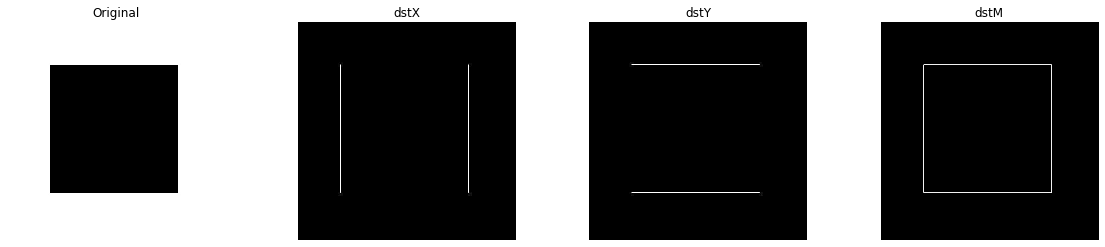

In [4]:
src = cv2.imread('./data/rectangle.jpg',cv2.IMREAD_GRAYSCALE) 

gx = cv2.Sobel(src,cv2.CV_32F,1,0,ksize=3)
gy = cv2.Sobel(src,cv2.CV_32F,0,1,ksize=3)

dstX = cv2.sqrt(np.abs(gx))
dstX = cv2.normalize(dstX,None,0,255,cv2.NORM_MINMAX,dtype=cv2.CV_8U)

dstY = cv2.sqrt(np.abs(gy))
dstY = cv2.normalize(dstY,None,0,255,cv2.NORM_MINMAX,dtype=cv2.CV_8U)

mag = cv2.magnitude(gx,gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('mag:',minVal,maxVal,minLoc,maxLoc)
dstM = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX,dtype=cv2.CV_8U)

plt.figure(figsize=(20,4))
imgae1=plt.subplot(1,4,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src, cmap="gray")

imgae2=plt.subplot(1,4,2)
imgae2.set_title('dstX')
plt.axis('off')
plt.imshow(dstX, cmap="gray")

imgae3=plt.subplot(1,4,3)
imgae3.set_title('dstY')
plt.axis('off')
plt.imshow(dstY, cmap="gray")

imgae3=plt.subplot(1,4,4)
imgae3.set_title('dstM')
plt.axis('off')
plt.imshow(dstM, cmap="gray")

plt.show()

#### Sobel Filter2(gradient orientation)

angle:  0.0 359.94378662109375 (0, 0) (400, 399)


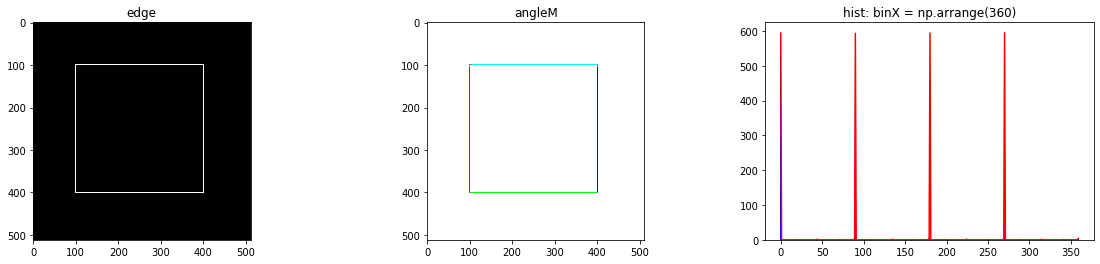

In [5]:
src = cv2.imread('./data/rectangle.jpg',cv2.IMREAD_GRAYSCALE)

gx = cv2.Sobel(src,cv2.CV_32F,1,0,ksize=3)
gy = cv2.Sobel(src,cv2.CV_32F,0,1,ksize=3)

mag,angle = cv2.cartToPolar(gx,gy,angleInDegrees =True)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(angle)
print('angle: ',minVal,maxVal,minLoc,maxLoc)

ret,edge = cv2.threshold(mag,100,255,cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)

width,height = mag.shape[:2]
angleM = np.full((width,height,3),(255,255,255),dtype=np.uint8)
for y in range(height):
    for x in range(width):
        if edge[y,x]!=0:
            if angle[y,x] == 0:
                angleM[y,x] = (0,0,255) # red
            elif angle[y,x] == 90:
                angleM[y,x] = (0,255,0) # green
            elif angle[y,x] == 180:
                angleM[y,x] = (255,0,0) # blue
            elif angle[y,x] == 270:
                angleM[y,x] = (0,255,255) # yellow
            else:
                angleM[y,x] = (128,128,128) # gray

hist = cv2.calcHist(images=[angle],channels=[0],mask=edge,histSize=[360],ranges=[0,360])
hist = hist.flatten()
                
plt.figure(figsize=(20,4))
imgae1=plt.subplot(1,3,1)
imgae1.set_title('edge')
plt.imshow(edge, cmap="gray")

imgae2=plt.subplot(1,3,2)
imgae2.set_title('angleM')
plt.imshow(angleM)

imgae3=plt.subplot(1,3,3)
imgae3.set_title('hist: binX = np.arrange(360)')
plt.plot(hist,color='r')
binX=np.arange(360)
plt.bar(binX,hist,width=1,color='b')

plt.show()

#### Laplacian 필터

In [6]:
#Component 선언
IntSlider_Gaussian = IntSlider(
    value=1,
    min=1,
    max=20,
    step=2,
    description='ksize: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Gaussian2 = IntSlider(
    value=0,
    min=0,
    max=10,
    step=1,
    description='Sigma: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original = Image(layout = Layout(border="solid"), width="50%")
wImg_Gaussian = Image(layout = Layout(border="solid"), width="50%")
wImg_Laplacian = Image(layout = Layout(border="solid"), width="50%")
wImg_Laplacian2 = Image(layout = Layout(border="solid"), width="50%")

items = [IntSlider_Gaussian,IntSlider_Gaussian2]
items2 = [wImg_original,wImg_Gaussian]
items3 = [wImg_Laplacian,wImg_Laplacian2]
Gaussian = Box(items)
Input =Box(items2)
Output = Box(items3)
box = layout(Gaussian,Input,Output)


tab_nest = widgets.Tab()
tab_nest.children = [box]
tab_nest.set_title(0, 'Gaussian Filter, Laplacian')
tab_nest

img = cv2.imread('./data/lena.jpg',0)
tmpStream = cv2.imencode(".jpeg", img)[1].tostring()
wImg_original.value = tmpStream

display.display(tab_nest)

#Event 선언
gaussian_ksize, gaussian_sigma = 1,0
    

def on_value_change_Gaussian(change):
    global gaussian_ksize, gaussian_sigma
    gaussian_ksize = change['new']
    Gaussian_img = cv2.GaussianBlur(img,ksize=(gaussian_ksize,gaussian_ksize),sigmaX=gaussian_sigma)
    tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
    wImg_Gaussian.value = tmpStream
    
    make_laplacian(Gaussian_img)
    
def on_value_change_Gaussian2(change):
    global gaussian_ksize, gaussian_sigma
    gaussian_sigma = change['new']
    Gaussian_img = cv2.GaussianBlur(img,ksize=(gaussian_ksize,gaussian_ksize),sigmaX=gaussian_sigma)
    tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
    wImg_Gaussian.value = tmpStream
    
    make_laplacian(Gaussian_img)

def make_laplacian(img):
    lap = cv2.Laplacian(img,cv2.CV_32F)
    minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(lap)
    dst = cv2.convertScaleAbs(lap)
    dst = cv2.normalize(dst,None,0,255,cv2.NORM_MINMAX)
    
    lap = lap.astype(np.uint8)
    tmpStream = cv2.imencode(".jpeg", lap)[1].tostring()
    wImg_Laplacian.value = tmpStream
    tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
    wImg_Laplacian2.value = tmpStream

#초기화 작업
Gaussian_img = cv2.GaussianBlur(img,ksize=(gaussian_ksize,gaussian_ksize),sigmaX=gaussian_sigma)
tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
wImg_Gaussian.value = tmpStream

make_laplacian(Gaussian_img)


#Component에 Event 장착
IntSlider_Gaussian.observe(on_value_change_Gaussian, names='value')
IntSlider_Gaussian2.observe(on_value_change_Gaussian2, names='value')

#### Laplacian 필터2: zero-crossing

In [7]:
#Component 선언
IntSlider_Gaussian = IntSlider(
    value=1,
    min=1,
    max=20,
    step=2,
    description='ksize: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Gaussian2 = IntSlider(
    value=0,
    min=0,
    max=10,
    step=1,
    description='Sigma: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Gaussian3 = IntSlider(
    value=1,
    min=1,
    max=20,
    step=2,
    description='ksize: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Gaussian4 = IntSlider(
    value=0,
    min=0,
    max=10,
    step=1,
    description='Sigma: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original = Image(layout = Layout(border="solid"), width="50%") 
wImg_Blur = Image(layout = Layout(border="solid"), width="50%") 
wImg_Gaussian = Image(layout = Layout(border="solid"), width="50%") 

wImg_original2 = Image(layout = Layout(border="solid"), width="50%") 
wImg_Blur2 = Image(layout = Layout(border="solid"), width="50%") 
wImg_Gaussian2 = Image(layout = Layout(border="solid"), width="50%") 

items = [IntSlider_Gaussian,IntSlider_Gaussian2]
items2 = [wImg_original,wImg_Blur]
Gaussian = Box(items)
Gaussian2 = Box(items2)
box1 = layout(Gaussian,Gaussian2,wImg_Gaussian)

items = [IntSlider_Gaussian3,IntSlider_Gaussian4]
items2 = [wImg_original2,wImg_Blur2]
Gaussian = Box(items)
Gaussian2 = Box(items2)
box2 = layout(Gaussian,Gaussian2,wImg_Gaussian2)

tab_nest = widgets.Tab()
tab_nest.children = [box1, box2]
tab_nest.set_title(0, 'Rectangle.jpg')
tab_nest.set_title(1, 'lena.jpg')
tab_nest

img = cv2.imread('./data/rectangle.jpg',0)
tmpStream = cv2.imencode(".jpeg", img)[1].tostring()
wImg_original.value = tmpStream

img2 = cv2.imread('./data/lena.jpg',0)
tmpStream = cv2.imencode(".jpeg", img2)[1].tostring()
wImg_original2.value = tmpStream

display.display(tab_nest)

#Event 선언
gaussian_ksize, gaussian_sigma = 1,0
gaussian_ksize2, gaussian_sigma2 = 1,0
    
def on_value_change_Gaussian(change):
    global gaussian_ksize, gaussian_sigma
    gaussian_ksize = change['new']
    Gaussian_img = cv2.GaussianBlur(img,ksize=(gaussian_ksize,gaussian_ksize),sigmaX=gaussian_sigma)
    tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
    wImg_Blur.value = tmpStream
    lap = cv2.Laplacian(Gaussian_img,cv2.CV_32F,3)
    zeroCrossing(lap,0)
    
def on_value_change_Gaussian2(change):
    global gaussian_ksize, gaussian_sigma
    gaussian_sigma = change['new']
    Gaussian_img = cv2.GaussianBlur(img,ksize=(gaussian_ksize,gaussian_ksize),sigmaX=gaussian_sigma)
    tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
    wImg_Blur.value = tmpStream
    lap = cv2.Laplacian(Gaussian_img,cv2.CV_32F,3)
    zeroCrossing(lap,0)
    
def on_value_change_Gaussian3(change):
    global gaussian_ksize2, gaussian_sigma2
    gaussian_ksize2 = change['new']
    Gaussian_img = cv2.GaussianBlur(img2,ksize=(gaussian_ksize2,gaussian_ksize2),sigmaX=gaussian_sigma2)
    tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
    wImg_Blur2.value = tmpStream
    lap = cv2.Laplacian(Gaussian_img,cv2.CV_32F,3)
    zeroCrossing(lap)
    
def on_value_change_Gaussian4(change):
    global gaussian_ksize2, gaussian_sigma2
    gaussian_sigma = change['new']
    Gaussian_img = cv2.GaussianBlur(img2,ksize=(gaussian_ksize2,gaussian_ksize2),sigmaX=gaussian_sigma2)
    tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
    wImg_Blur2.value = tmpStream
    lap = cv2.Laplacian(Gaussian_img,cv2.CV_32F,3)
    zeroCrossing(lap,0)
    
def SGN(x):
    if x>=0:
        sign=1
    else:
        sign=-1
    return sign

def zeroCrossing(lap,option=1):
    width,height = lap.shape
    Z = np.zeros(lap.shape,dtype=np.uint8)
    for y in range(1,height-1):
        for x in range(1,width-1):
            neighbors = [lap[y-1,x],lap[y+1,x],lap[y,x-1],lap[y,x+1],
            lap[y-1,x-1],lap[y-1,x+1],
            lap[y+1,x-1],lap[y+1,x+1]]
            mValue = min(neighbors)
            if SGN(lap[y,x]) != SGN(mValue):
                Z[y,x] = 255
    
    if option==0:
        tmpStream = cv2.imencode(".jpeg", Z)[1].tostring()
        wImg_Gaussian.value = tmpStream
    else:
        tmpStream = cv2.imencode(".jpeg", Z)[1].tostring()
        wImg_Gaussian2.value = tmpStream

#초기화 작업
Gaussian_img = cv2.GaussianBlur(img,ksize=(gaussian_ksize,gaussian_ksize),sigmaX=gaussian_sigma)
tmpStream = cv2.imencode(".jpeg", Gaussian_img)[1].tostring()
wImg_Blur.value = tmpStream
lap = cv2.Laplacian(Gaussian_img,cv2.CV_32F,3)
zeroCrossing(lap,0)

Gaussian_img2 = cv2.GaussianBlur(img2,ksize=(gaussian_ksize2,gaussian_ksize2),sigmaX=gaussian_sigma2)
tmpStream = cv2.imencode(".jpeg", Gaussian_img2)[1].tostring()
wImg_Blur2.value = tmpStream
lap2 = cv2.Laplacian(Gaussian_img2,cv2.CV_32F,3)
zeroCrossing(lap2)

#Component에 Event 장착
IntSlider_Gaussian.observe(on_value_change_Gaussian, names='value')
IntSlider_Gaussian2.observe(on_value_change_Gaussian2, names='value')
IntSlider_Gaussian3.observe(on_value_change_Gaussian3, names='value')
IntSlider_Gaussian4.observe(on_value_change_Gaussian4, names='value')

### 일반적인 필터 연산

#### cv2.filter2D()와 cv2.sepFilter2D()에 의한 에지 검출

kx= [[-1.]
 [ 0.]
 [ 1.]]
ky= [[1.]
 [2.]
 [1.]]
sobelX= [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
kx= [[1.]
 [2.]
 [1.]]
ky= [[-1.]
 [ 0.]
 [ 1.]]
sobelY= [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


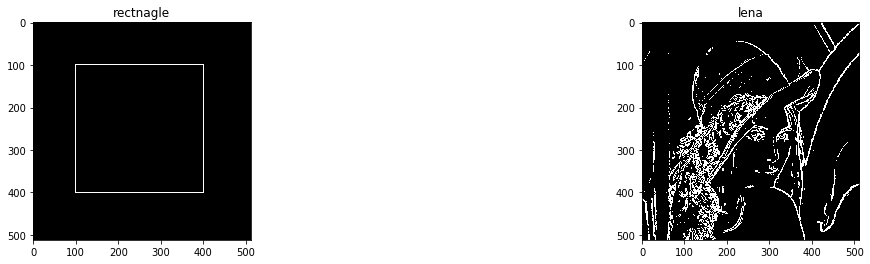

In [8]:
src1 = cv2.imread('./data/rectangle.jpg',0)
src2 = cv2.imread('./data/lena.jpg',0)

kx,ky = cv2.getDerivKernels(1,0,ksize=3)
sobelX = ky.dot(kx.T)
print('kx=',kx)
print('ky=',ky)
print('sobelX=',sobelX)
gx = cv2.filter2D(src1,cv2.CV_32F,sobelX)
gx2 = cv2.sepFilter2D(src2,cv2.CV_32F,kx,ky)

kx,ky = cv2.getDerivKernels(0,1,ksize=3)
sobelY = ky.dot(kx.T)
print('kx=',kx)
print('ky=',ky)
print('sobelY=',sobelY)
gy = cv2.filter2D(src1,cv2.CV_32F,sobelY)
gy2 = cv2.sepFilter2D(src2,cv2.CV_32F,kx,ky)

mag = cv2.magnitude(gx,gy)
ret,edge = cv2.threshold(mag,100,255,cv2.THRESH_BINARY)

mag2 = cv2.magnitude(gx2,gy2)
ret2,edge2 = cv2.threshold(mag2,100,255,cv2.THRESH_BINARY)

plt.figure(figsize=(20,4))
imgae1=plt.subplot(1,2,1)
imgae1.set_title('rectnagle')
plt.imshow(edge, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('lena')
plt.imshow(edge2, cmap="gray")

plt.show()

#### Log필터링, 0-교차 에지 영상

In [9]:
#Component 선언
IntSlider_Ksize = IntSlider(
    value=1,
    min=1,
    max=20,
    step=2,
    description='ksize: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)


def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original = Image(layout = Layout(border="solid"), width="50%")
wImg_LoG = Image(layout = Layout(border="solid"), width="50%")
wImg_ZeroCrossing = Image(layout = Layout(border="solid"), width="50%") 

items = [wImg_LoG,wImg_ZeroCrossing]
Output = Box(items)
box = layout(IntSlider_Ksize,wImg_original,Output)

tab_nest = widgets.Tab()
tab_nest.children = [box]
tab_nest.set_title(0, 'Zero Crossing')
tab_nest

img = cv2.imread('./data/lena.jpg',0)
tmpStream = cv2.imencode(".jpeg", img)[1].tostring()
wImg_original.value = tmpStream

display.display(tab_nest)

#Event 선언
ksize, sigma = 1,0

def on_value_change_Ksize(change):
    global ksize, sigma
    ksize = change['new']
    
    kernel = logFilter()
    LoG = cv2.filter2D(img,cv2.CV_32F,kernel)
    LoG_img = LoG.astype(np.uint8)
    
    tmpStream = cv2.imencode(".jpeg", LoG_img)[1].tostring()
    wImg_LoG.value = tmpStream
    
    edgeZ = zeroCrossing(LoG)
    tmpStream = cv2.imencode(".jpeg", edgeZ)[1].tostring()
    wImg_ZeroCrossing.value = tmpStream
    
    
    
def logFilter():
    global ksize
    k2 = ksize//2
    sigma = 0.3 * (k2-1)+0.8
    print('sigma=',sigma)
    LoG = np.zeros((ksize,ksize),dtype=np.float32)
    for y in range(-k2,k2+1):
        for x in range(-k2,k2+1):
            g = -(x*x+y*y)/(2.0*sigma**2.0)
            LoG[y+k2,x+k2] = -(1.0+g)*np.exp(g)/(np.pi*sigma**4.0)
    return LoG        


def zeroCrossing(lap,thresh=0.01):
    width,height = lap.shape
    Z = np.zeros(lap.shape,dtype=np.uint8)
    for y in range(1,height-1):
        for x in range(1,width-1):
            neighbors = [lap[y-1,x],lap[y+1,x],lap[y,x-1],lap[y,x+1],
            lap[y-1,x-1],lap[y-1,x+1],
            lap[y+1,x-1],lap[y+1,x+1]]
            pos = 0
            neg = 0
            for value in neighbors:
                if value>thresh:
                    pos+=1
                if value<thresh:
                    neg+=1
            if pos > 0 and neg > 0:
                Z[y,x] = 255
    
    return Z
           

#초기화 작업
kernel = logFilter()
LoG = cv2.filter2D(img,cv2.CV_32F,kernel)
LoG_img = LoG.astype(np.uint8)

tmpStream = cv2.imencode(".jpeg", LoG_img)[1].tostring()
wImg_LoG.value = tmpStream
    
edgeZ = zeroCrossing(LoG)
tmpStream = cv2.imencode(".jpeg", edgeZ)[1].tostring()
wImg_ZeroCrossing.value = tmpStream


#Component에 Event 장착
IntSlider_Ksize.observe(on_value_change_Ksize, names='value')

sigma= 0.5


### 모폴리지 연산

#### 데이터 생성

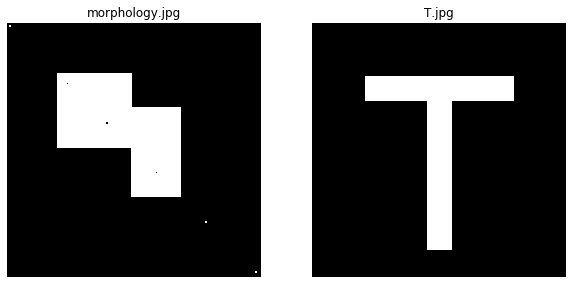

True

In [10]:
def plot(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
img = np.zeros((512,512,3),dtype=np.int32)

pt1 = 100,100
pt2 = 250,250
cv2.rectangle(img,pt1,pt2,(255,255,255),-1)

pt3 = 250,170
pt4 = 350,350
cv2.rectangle(img,pt3,pt4,(255,255,255),-1)

pt4 = 120,120
pt5 = 122,122
cv2.rectangle(img,pt4,pt5,(0,0,0),-1)

pt6 = 200,200
pt7 = 202,202
cv2.rectangle(img,pt6,pt7,(0,0,0),-1)

pt8 = 300,300
pt9 = 302,302
cv2.rectangle(img,pt8,pt9,(0,0,0),-1)

pt10 = 400,400
pt11 = 402,402
cv2.rectangle(img,pt10,pt11,(255,255,255),-1)

pt12 = 5,5
pt13 = 7,7
cv2.rectangle(img,pt12,pt13,(255,255,255),-1)

pt14 = 500,500
pt15 = 502,502
cv2.rectangle(img,pt14,pt15,(255,255,255),-1)

img2 = np.zeros((512,512,3),dtype=np.int32)
cx = 512/2
cy = 512/2

pt1 = int(cx-150),int(cy-150)
pt2 = int(cx+150),int(cy-100)
cv2.rectangle(img2,pt1,pt2,(255,255,255),-1)

pt3 = int(cx-25),int(cy-150)
pt4 = int(cx+25),int(cy+200)
cv2.rectangle(img2,pt3,pt4,(255,255,255),-1)

plt.figure(figsize=(10,10))
imgae1=plt.subplot(1,2,1)
imgae1.set_title('morphology.jpg')
plt.axis('off')
plt.imshow(img, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('T.jpg')
plt.axis('off')
plt.imshow(img2, cmap="gray")

plt.show()
cv2.imwrite('./data/morphology.jpg',img)
cv2.imwrite('./data/T.jpg',img2)

#### 모폴리지 연산1

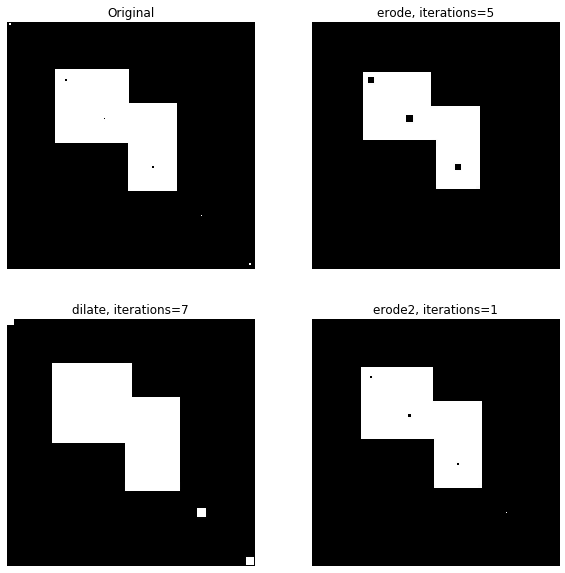

In [11]:
src = cv2.imread('./data/morphology.jpg',0)
kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT,ksize=(3,3))
erode = cv2.erode(src,kernel,iterations=5)
dilate = cv2.dilate(src,kernel,iterations=7)
erode2 = cv2.erode(src,kernel,iterations=1)

plt.figure(figsize=(10,10))
imgae1=plt.subplot(2,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src, cmap="gray")

imgae2=plt.subplot(2,2,2)
imgae2.set_title('erode, iterations=5')
plt.axis('off')
plt.imshow(erode, cmap="gray")

imgae3=plt.subplot(2,2,3)
imgae3.set_title('dilate, iterations=7')
plt.axis('off')
plt.imshow(dilate, cmap="gray")

imgae4=plt.subplot(2,2,4)
imgae4.set_title('erode2, iterations=1')
plt.axis('off')
plt.imshow(erode2, cmap="gray")

plt.show()

#### morphologyEx()

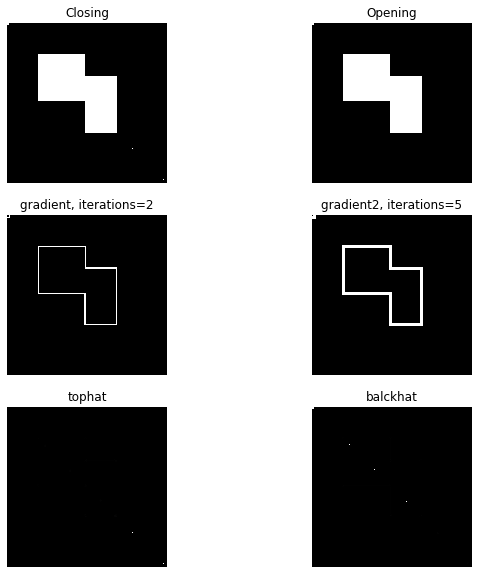

In [12]:
src = cv2.imread('./data/morphology.jpg',0)
kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT,ksize=(3,3))
closing = cv2.morphologyEx(src,cv2.MORPH_CLOSE,kernel,iterations=5)
opening = cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel,iterations=5)
gradient = cv2.morphologyEx(opening,cv2.MORPH_GRADIENT,kernel,iterations=2)
gradient2 = cv2.morphologyEx(opening,cv2.MORPH_GRADIENT,kernel,iterations=5)

tophat= cv2.morphologyEx(src,cv2.MORPH_TOPHAT,kernel,iterations=5)
balckhat= cv2.morphologyEx(src,cv2.MORPH_BLACKHAT,kernel,iterations=5)

plt.figure(figsize=(10,10))
imgae1=plt.subplot(3,2,1)
imgae1.set_title('Closing')
plt.axis('off')
plt.imshow(closing, cmap="gray")

imgae2=plt.subplot(3,2,2)
imgae2.set_title('Opening')
plt.axis('off')
plt.imshow(opening, cmap="gray")

imgae3=plt.subplot(3,2,3)
imgae3.set_title('gradient, iterations=2')
plt.axis('off')
plt.imshow(gradient, cmap="gray")

imgae4=plt.subplot(3,2,4)
imgae4.set_title('gradient2, iterations=5')
plt.axis('off')
plt.imshow(gradient2, cmap="gray")

imgae5=plt.subplot(3,2,5)
imgae5.set_title('tophat')
plt.axis('off')
plt.imshow(tophat, cmap="gray")

imgae6=plt.subplot(3,2,6)
imgae6.set_title('balckhat')
plt.axis('off')
plt.imshow(balckhat, cmap="gray")

plt.show()

#### 데이터 생성

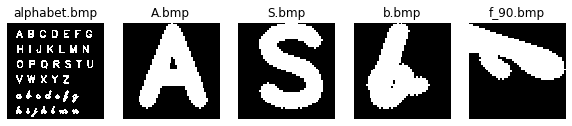

True

In [13]:
img = np.zeros((512,512,3),dtype=np.int32)

text = 'A B C D E F G'
text2 = 'H I J K L M N'
text3 = 'O P Q R S T U'
text4 = 'V W X Y Z'
text5= 'a b c d e f g'
text6 = 'h i j k l m n'
text_array = [text,text2,text3,text4,text5,text6]
text7='A'
text8='S'
text9='b'
text10='f'

count = 1
font = cv2.FONT_HERSHEY_SIMPLEX

for t in text_array:
    if count>4:
        font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
    org = (50,count*80)
    cv2.putText(img,t,org,font,1.7,(255,255,255),7)
    count = count+1
    
org = (10,40)
font = cv2.FONT_HERSHEY_SIMPLEX
img2 = np.zeros((50,50,3),dtype=np.int32)
cv2.putText(img2,text7,org,font,1.7,(255,255,255),7)

img3 = np.zeros((50,50,3),dtype=np.int32)
cv2.putText(img3,text8,org,font,1.7,(255,255,255),7)

font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
img4 = np.zeros((50,50,3),dtype=np.int32)
cv2.putText(img4,text9,org,font,1.7,(255,255,255),7)

font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
img5 = np.zeros((50,50,3),dtype=np.int32)
cv2.putText(img5,text10,org,font,1.7,(255,255,255),7)
img5 = cv2.rotate(img5, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(10,10))
imgae1=plt.subplot(1,5,1)
imgae1.set_title('alphabet.bmp')
plt.axis('off')
plt.imshow(img)

imgae2=plt.subplot(1,5,2)
imgae2.set_title('A.bmp')
plt.axis('off')
plt.imshow(img2)

imgae3=plt.subplot(1,5,3)
imgae3.set_title('S.bmp')
plt.axis('off')
plt.imshow(img3)

imgae4=plt.subplot(1,5,4)
imgae4.set_title('b.bmp')
plt.axis('off')
plt.imshow(img4)


imgae5=plt.subplot(1,5,5)
imgae5.set_title('f_90.bmp')
plt.axis('off')
plt.imshow(img5)

plt.show()
cv2.imwrite('./data/alphabet.bmp',img)
cv2.imwrite('./data/A.bmp',img2)
cv2.imwrite('./data/S.bmp',img3)
cv2.imwrite('./data/b.bmp',img4)
cv2.imwrite('./data/f_90.bmp',img5)

#### 모폴로지 연산 골격화

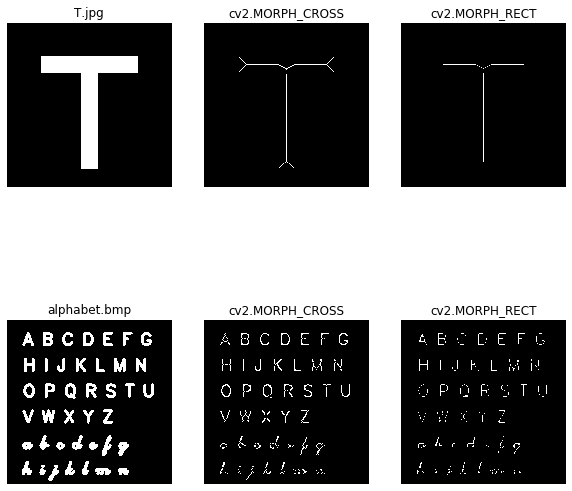

In [14]:
src = cv2.imread('./data/T.jpg',0)
src2 = cv2.imread('./data/alphabet.bmp',0)

ret,A = cv2.threshold(src,128,255,cv2.THRESH_BINARY)
ret,B = cv2.threshold(src2,128,255,cv2.THRESH_BINARY)

shape1 = cv2.MORPH_CROSS
shape2 = cv2.MORPH_RECT

C = cv2.getStructuringElement(shape=shape1,ksize=(7,7))
D = cv2.getStructuringElement(shape=shape2,ksize=(7,7))

def skel_func(img,option=0):
    done = True
    A_1 = img
    A_2 = img
    skel_dst = np.zeros(src.shape,np.uint8)
    skel_dst2 = np.zeros(src.shape,np.uint8)

    while done:
        erode = cv2.erode(A_1,C)
        
        opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,C)
        
            
        tmp = cv2.subtract(erode,opening)
        
        erode2 = cv2.erode(A_2,D)
        opening2 = cv2.morphologyEx(erode,cv2.MORPH_OPEN,D)
        tmp2 = cv2.subtract(erode2,opening2)
        
        skel_dst = cv2.bitwise_or(skel_dst,tmp)
        skel_dst2 = cv2.bitwise_or(skel_dst2,tmp2)
        
        A_1 = erode.copy()
        A_2 = erode.copy()
        
        done = (cv2.countNonZero(A_1) !=0) and (cv2.countNonZero(A_2) !=0)
    return skel_dst,skel_dst2
    

skel_dst,skel_dst2 = skel_func(A)
skel_dst3,skel_dst4 = skel_func(B,1)

plt.figure(figsize=(10,10))

imgae1=plt.subplot(2,3,1)
imgae1.set_title('T.jpg')
plt.axis('off')
plt.imshow(src, cmap="gray")

imgae2=plt.subplot(2,3,2)
imgae2.set_title('cv2.MORPH_CROSS')
plt.axis('off')
plt.imshow(skel_dst, cmap="gray")

imgae2=plt.subplot(2,3,3)
imgae2.set_title('cv2.MORPH_RECT')
plt.axis('off')
plt.imshow(skel_dst2, cmap="gray")

imgae1=plt.subplot(2,3,4)
imgae1.set_title('alphabet.bmp')
plt.axis('off')
plt.imshow(src2, cmap="gray")

imgae2=plt.subplot(2,3,5)
imgae2.set_title('cv2.MORPH_CROSS')
plt.axis('off')
plt.imshow(skel_dst3, cmap="gray")

imgae2=plt.subplot(2,3,6)
imgae2.set_title('cv2.MORPH_RECT')
plt.axis('off')
plt.imshow(skel_dst4, cmap="gray")

plt.show()

#### 템플릿 매칭

TM_SQDIFF_NORMED:  0.0 (40, 40)


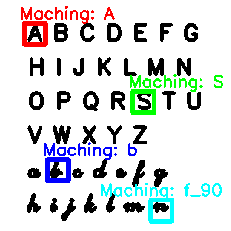

In [15]:
src = cv2.imread('./data/alphabet.bmp',0)
src = cv2.bitwise_not(src)

tmp_A = cv2.imread('./data/A.bmp',0)
tmp_S = cv2.imread('./data/S.bmp',0)
tmp_b = cv2.imread('./data/b.bmp',0)
tmp_f_90 = cv2.imread('./data/f_90.bmp',0)

tmp_A = cv2.bitwise_not(tmp_A)
tmp_S = cv2.bitwise_not(tmp_S)
tmp_b = cv2.bitwise_not(tmp_b)
tmp_f_90 = cv2.bitwise_not(tmp_f_90)

dst = cv2.cvtColor(src,cv2.COLOR_GRAY2BGR)

font = cv2.FONT_HERSHEY_SIMPLEX

R1 = cv2.matchTemplate(src,tmp_A,cv2.TM_SQDIFF_NORMED)
minVal,_,minLoc,_ = cv2.minMaxLoc(R1)
print('TM_SQDIFF_NORMED: ',minVal, minLoc)

w,h = tmp_A.shape[:2]
cv2.rectangle(dst,minLoc,(minLoc[0]+h,minLoc[1]+w),(255,0,0),10)

text = 'Maching: A'
dx,dy = minLoc
dx = dx-10
dy = dy-10
org = (dx,dy)
cv2.putText(dst,text,org,font,1.3,(255,0,0),4)


R2 = cv2.matchTemplate(src,tmp_S,cv2.TM_SQDIFF_NORMED)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(R2)

w,h = tmp_S.shape[:2]
cv2.rectangle(dst,minLoc,(minLoc[0]+h,minLoc[1]+w),(0,255,0),10)

text = 'Maching: S'
dx,dy = minLoc
dx = dx-10
dy = dy-10
org = (dx,dy)
cv2.putText(dst,text,org,font,1.3,(0,255,0),4)

R3 = cv2.matchTemplate(src,tmp_b,cv2.TM_SQDIFF_NORMED)
minVal,_,minLoc,_ = cv2.minMaxLoc(R3)

w,h = tmp_b.shape[:2]
cv2.rectangle(dst,minLoc,(minLoc[0]+h,minLoc[1]+w),(0,0,255),10)

text = 'Maching: b'
dx,dy = minLoc
dx = dx-10
dy = dy-10
org = (dx,dy)
cv2.putText(dst,text,org,font,1.3,(0,0,255),4)

R4 = cv2.matchTemplate(src,tmp_f_90,cv2.TM_SQDIFF_NORMED)
minVal,_,minLoc,_ = cv2.minMaxLoc(R4)

w,h = tmp_b.shape[:2]
cv2.rectangle(dst,minLoc,(minLoc[0]+h,minLoc[1]+w),(0,255,255),10)

text = 'Maching: f_90'
dx,dy = minLoc
dx = dx-120
dy = dy-10
org = (dx,dy)
cv2.putText(dst,text,org,font,1.3,(0,255,255),4)

plt.axis('off')
plt.imshow(dst)

**cv2에서 지원하는 템플렛 매칭의 경우 회전이나 글자크기는 Detect하지 못하는 한계점이 분명하게 존재한다.**  
**결과를 확인하면 f를 회전한 alphabet은 잘못된 글자를 mapping하는 것을 확인할 수 있다.**